In [24]:
from fastai.vision import *
from fastai.widgets import *

# Squash Classifier

I love winter squash. I typically hate summer squash. This classifier will help me make sure that I never accidentally purchas a zucchini squash when what I really want is an acorn squash.

In [25]:
path = Path('data/squash')

In [26]:
types = ['butternut', 'pumpkin', 'acorn', 'zucchini', 'tromboncino']

In [3]:
# create directories for training data
for type in types:
    folder = type
    file = f'urls_{type}'
    dest = path/folder
    dest.mkdir(parents=True, exist_ok=True)

In [4]:
# make sure all my directories are in place
path.ls()

[PosixPath('data/squash/pumpkin'),
 PosixPath('data/squash/pumpkin.txt'),
 PosixPath('data/squash/tromboncino.txt'),
 PosixPath('data/squash/acorn.txt'),
 PosixPath('data/squash/tromboncino'),
 PosixPath('data/squash/.ipynb_checkpoints'),
 PosixPath('data/squash/acorn'),
 PosixPath('data/squash/butternut.txt'),
 PosixPath('data/squash/zucchini.txt'),
 PosixPath('data/squash/zucchini'),
 PosixPath('data/squash/butternut')]

In [5]:
for type in types:
    download_images(path/f'{type}.txt', path/f'{type}/')

Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '

In [6]:
# verify all the URLs work and the images aren't broken:
for type in types:
    print(type)
    verify_images(path/type, delete=True, max_size=500)

butternut


pumpkin


acorn


zucchini


tromboncino


In [54]:
# Create ImageDataBunch. This will split data into train/valid/test 
np.random.seed(333)
data = ImageDataBunch.from_folder(path, train='.', valid_pct=0.2,
                                  ds_tfms=get_transforms(), size=224,).normalize(imagenet_stats)

In [28]:
# Take a look at the classes in our ImageDataBunch. This should match the classes we made 
# file paths for. If not check previous steps.
data.classes, len(data.train_ds), len(data.valid_ds)

(['acorn', 'butternut', 'pumpkin', 'tromboncino', 'zucchini'], 388, 96)

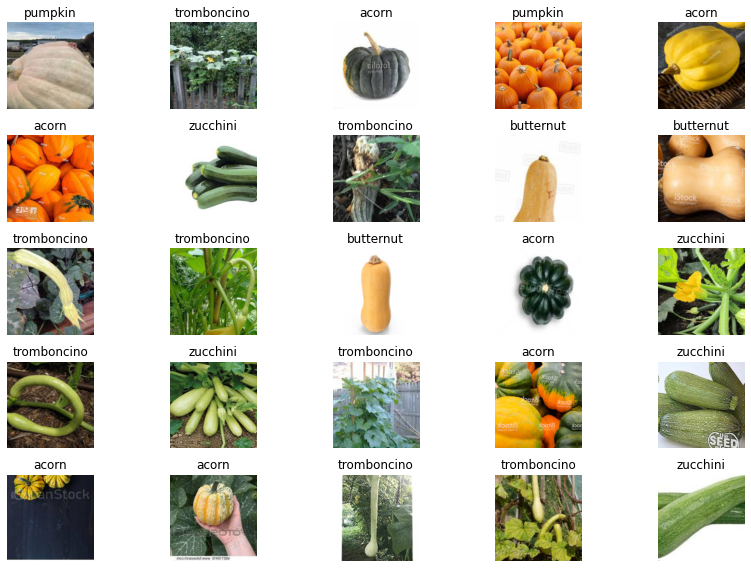

In [29]:
#Take a peek at our data.
data.show_batch(rows=5, figsize=(12,8))

In [55]:
learner = cnn_learner(data, models.resnet34, metrics=error_rate)

In [56]:
learner.fit_one_cycle(5, max_lr=5e-3)

epoch,train_loss,valid_loss,error_rate,time
0,2.245998,0.528153,0.200000,00:37
1,1.290118,0.384478,0.070588,00:37
2,0.909662,0.397856,0.070588,00:36
3,0.709544,0.348763,0.070588,00:36
4,0.559302,0.334570,0.082353,00:37


In [57]:
learner.save('stage-1')


In [58]:
# Let's take a look at how our learner is doing:
interp = ClassificationInterpretation.from_learner(learner)

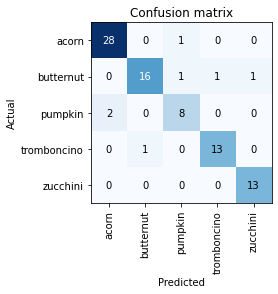

In [59]:
interp.plot_confusion_matrix()

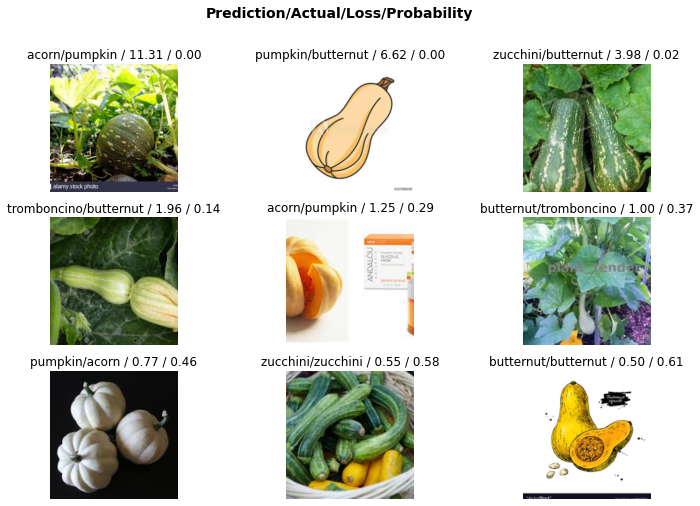

In [60]:
interp.plot_top_losses(9, figsize=(12,8))

In [61]:
learner.export()

In [62]:
defaults.device = torch.device('cpu')

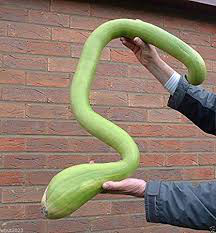

In [68]:
img = open_image('images.jpg')
img

In [69]:
learner.predict(img)

(Category tromboncino,
 tensor(3),
 tensor([8.9010e-14, 1.3308e-14, 3.8763e-12, 1.0000e+00, 3.4876e-11]))